In [4]:
import numpy as np 
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


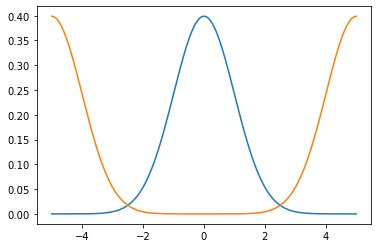

In [99]:
#problem 1

def conv_shift(x,a):
    a = np.asarray([a])
    b = np.zeros(len(x))
    b[a] = 1
    return np.fft.ifft(np.fft.fft(x)*np.fft.fft(b))

def gauss(x,sigma,mu):
    return 1/(sigma*(np.sqrt(2*np.pi)))*np.exp(-1/2*((x-mu)/sigma)**2)

x = np.linspace(-5,5,1000)
y = gauss(x,1,0)
y2 = conv_shift(y,500)

plt.plot(x,y)
plt.plot(x,y2)
    

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


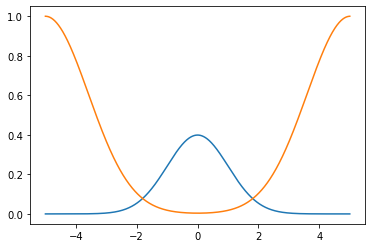

In [7]:
#problem 2

def corr(f,g):
    assert len(g)==len(f)
    return np.fft.ifft(np.fft.fft(f)*np.conj(np.fft.fft(g)))

def gauss(x,sigma,mu):
    return 1/(sigma*(np.sqrt(2*np.pi)))*np.exp(-1/2*((x-mu)/sigma)**2)

x = np.linspace(-5,5,1001)
y_gauss = gauss(x,1,0)
y_corr = corr(y_gauss,y_gauss)
y_corr2 = np.correlate(y_gauss,y_gauss)

plt.plot(x,y_gauss)
plt.plot(x,y_corr/np.max(y_corr))

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


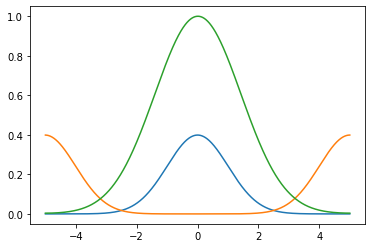

In [111]:
#problem 3

x = np.linspace(-5,5,1001)
y = gauss(x,1,0)
y_shift = conv_shift(y,500)
y_corr = corr(y,y_shift)
plt.plot(x,y)
plt.plot(x,y_shift)
plt.plot(x,y_corr/(np.max(y_corr)))

#the correlation is also shifted when the by the amount the gaussian is shifted by.
#this is to be expected. why???

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


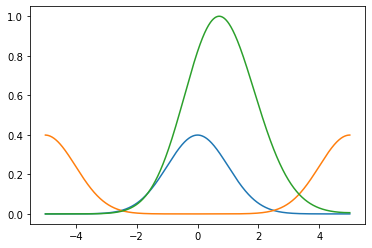

In [135]:
#problem 4 
x = np.linspace(-5,5,1001)
y = gauss(x,1,0)
y2 = conv_shift(y,500)

def conv_pad(x,y):
    assert len(x)==len(y)
    x2 = np.pad(x,[0,len(x)])
    y2 = np.pad(y,[0,len(y)])
    conv = np.fft.ifft(np.fft.fft(x2)*np.fft.fft(y2))
    return conv[:len(x)]

y_conv_pad = conv_pad(y,y2)
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y_conv_pad/np.max(y_conv_pad))

<ipython-input-144-8094aa686dbc>:20: ComplexWarning: Casting complex values to real discards the imaginary part
  fft_sine_a[i] = summation(k[i],x)*temp_var


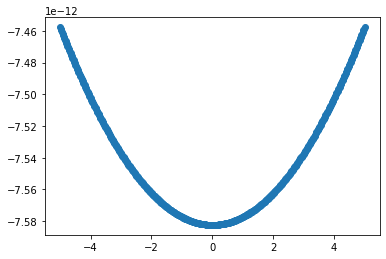

In [144]:
#problem 5
#part c
def sine(k,x):
        return np.sin(2*np.pi*k*x)
def summation(k,x):
    a = 0
    for i in range(len(x)):
        a = a + np.exp(-2*np.pi*1j*k*x[i]/len(x))
    return a

x = np.linspace(-5,5,500)
k = x.copy()
k2 = 3
fft_sine_a = np.zeros(len(x)) 
for i in range(len(k)):
    temp_var = 0
    for j in range(len(x)):
        temp_var = temp_var + sine(k2,x[j])
    #print(summation(k[i],x).real)
    fft_sine_a[i] = summation(k[i],x)*temp_var
    
plt.scatter(x,fft_sine_a)
#plt.scatter(x,np.fft.fft(sine(k2,x)))

<ipython-input-146-67a2ecf7d89a>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  fft_sine_a[i] = temp_var


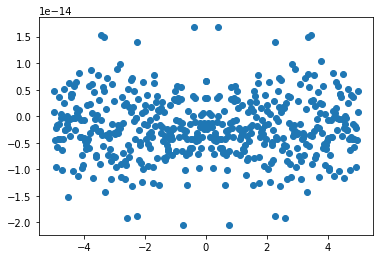

In [146]:
k2 = 1.4
fft_sine_a = np.zeros(len(x))
for i in range(len(k)):
    temp_var = 0 
    for j in range(len(x)):
        temp_var =  temp_var + np.sin(2*np.pi*k2*x[j])*np.exp(-2*np.pi*1j*k[i]*x[j]/len(x))
    fft_sine_a[i] = temp_var
plt.scatter(x,fft_sine_a)

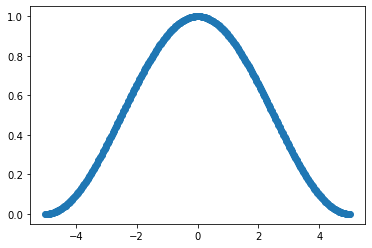

In [141]:
#part d
#the window function
plt.scatter(x,.5*(1+np.cos(2*np.pi*x/10)))

(-1.0, 1.0)

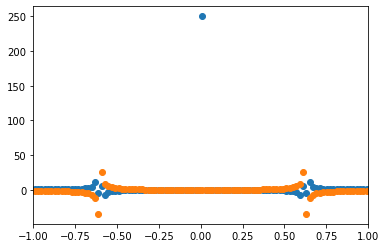

In [142]:

plt.scatter(x,np.fft.fftshift(np.fft.fft(.5*(1+np.cos(2*np.pi*x/10)*sine(k2,x)))))
plt.scatter(x,np.fft.fftshift(np.fft.fft(sine(k2,x))))
plt.xlim(-1,1)

In [140]:
#part e

fft_w = np.fft.fft(.5*(1+np.cos(2*np.pi*x/10)))
print("N = ", len(fft_w))
print(fft_w[0].real)
print(fft_w[1].real)
print(fft_w[-1].real)

N =  500
249.50000000000003
-125.12183198988396
-125.12183198988396


In [110]:
a = 1+1j

In [114]:
a.real

1.0